# Python Programmieraufgabe und Clustering

Von Wikipedia:
"Data Science (von englisch data „Daten“ und science „Wissenschaft“, im Deutschen auch Datenwissenschaft) bezeichnet generell die Extraktion von Wissen aus Daten."


"Data Science ist ein interdisziplinäres Wissenschaftsfeld, welches wissenschaftlich fundierte Methoden, Prozesse, Algorithmen und Systeme zur Extraktion von Erkenntnissen, Mustern und Schlüssen sowohl aus strukturierten als auch unstrukturierten Daten ermöglicht[3][4].

Der Studiengang Data Science verwendet Techniken und Theorien aus den Fächern Mathematik, Statistik und Informationstechnologie, einschließlich der Signalverarbeitung, verwendet Wahrscheinlichkeitsmodelle des maschinellen Lernens, des statistischen Lernens, der Programmierung, der Datentechnik, der Mustererkennung, der Prognostik, der Modellierung von Unsicherheiten und der Datenlagerung.

Personen, die im Bereich Data Science arbeiten, werden als Data Scientist bzw. Datenwissenschaftler bezeichnet, wobei meist speziellere oder Spezialisierungen anderer, übergeordneter Berufsbezeichnungen üblich sind (z. B. Statistiker, Informatiker). "

Im Bereich Data Science analysieren wir große und kleine Datenmengen. Diese Daten liegen oft in Tabellen (wie Excel) vor.


### Einstieg
Zunächst werden benötigte Pakete installiert. 
* Numpy und Pandas werden sehr häufig von Data Scientisten genutzt. Mehr dazu später!
* CSV wird benötigt, da die Datentabelle eine csv Datei ist. Man kann sie auch in Excel öffnen.
* Matplotlib benötigen wir für die Grafiken.

In [1]:
# import necessary modules

import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

### Einlesen der Daten
Aufgabe 1: Lies die Daten aus der Date "data1.csv" ein und speichere sie als ein Pandas-Dataframe unter dem Namen "data".

Aufgabe 2: Lass dir die ersten 10 Zeilen von "data" ausgeben.

In [17]:
# read data from 'data1.csv' and store the data in variable 'data'
data = pd.read_csv('data1.csv')
# show first ten rows in 'data'
data.head(10)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
5,24.169930,32.024780
6,21.665780,4.892855
7,4.693684,12.342170
8,19.211910,-1.121366
9,4.230391,-4.441536


Aufgabe 3: Wähle nur eine Spalte aus und drucke die ersten 10 Zeilen.

In [18]:
data["V1"].head(10)

0     2.072345
1    17.936710
2     1.083576
3    11.120670
4    23.711550
5    24.169930
6    21.665780
7     4.693684
8    19.211910
9     4.230391
Name: V1, dtype: float64

### Visualisierung der Daten

Aufgabe 4: Erstelle eine Grafik mit einer der Spalten auf der x-Achse und die andere auf der y-Achse. Die Werte sollen als Punkte dargestellt werden, dies nennen wir ein Scatterdirgramm. Was fällt dir auf? Erkennst du ein Muster?

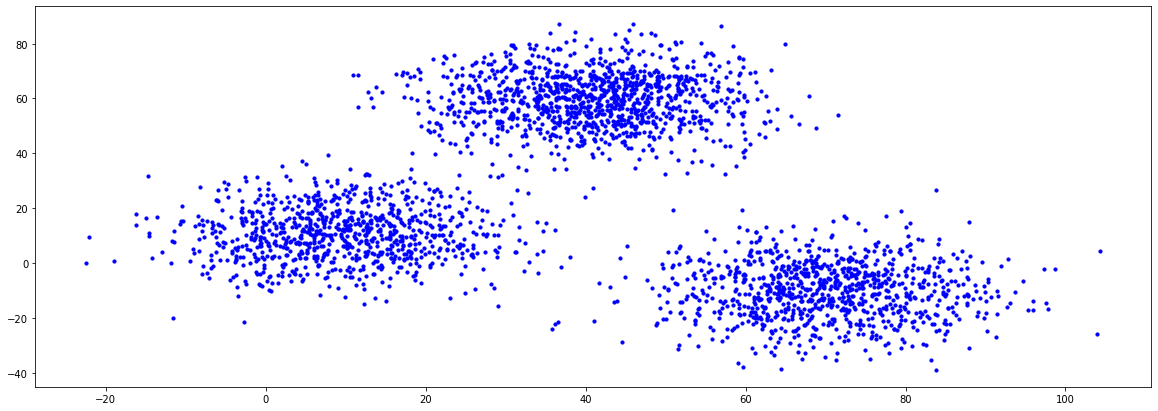

In [20]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.scatter(data["V1"], data["V2"], c='blue', s =10)

### Clustering Methode 1: k-means

In [4]:
# import k-means module and DBSCAN module from sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [27]:
# convert pandas dataframe data to numpy array data_array
data_array = data.values   


Aufgabe 5: Jetzt werden Cluster erstellt. Die Anzahl (cluster_num) kann man variieren. Was passiert wenn du verschiedene Anzahlen ausprobierst (maximal 9, sonst müssen noch mehr Farben hinzugefügt werden.)?

Aufgabe 6: Überlege dir was ein "gutes" Cluster ist? Welche Anzahl von Clustern sind (in diesem Beispiel) gut und warum?

Aufgabe 7: Nutze deinen finalen Wert für cluster_num.

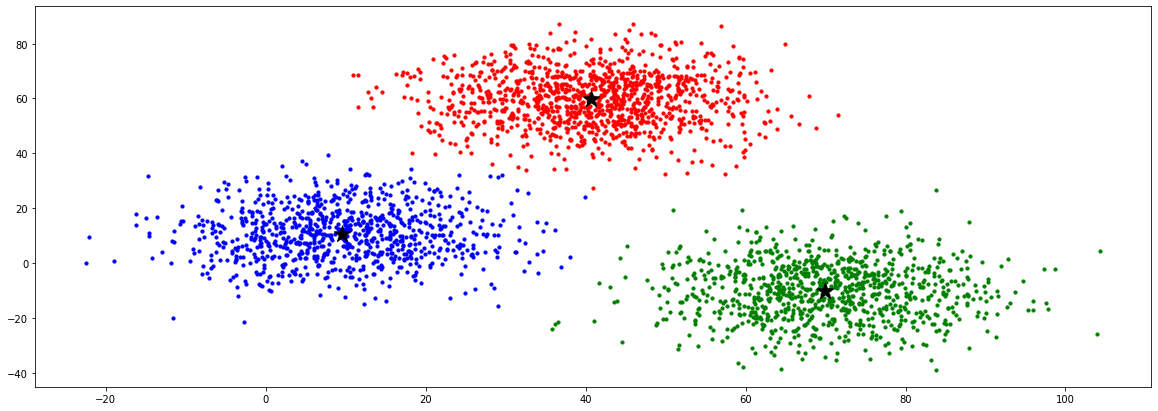

In [38]:
cluster_num = 3 # max 9

kmeans = KMeans(cluster_num).fit(data_array)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange', 'purple']
for cluster_index in range(cluster_num) :
    sub_set = np.array([data_array[i] for i in range(len(data_array)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

## Clustering Methode 2: DBSCAN

Aufgabe 8: Das gleiche wird mit dem Algorithmus DBSCAN gemacht. Vergleiche die Ergebisse mit k-means. Was fällt dir auf? Welche Methode ist besser und warum?

[-1, 0, 1, 2]


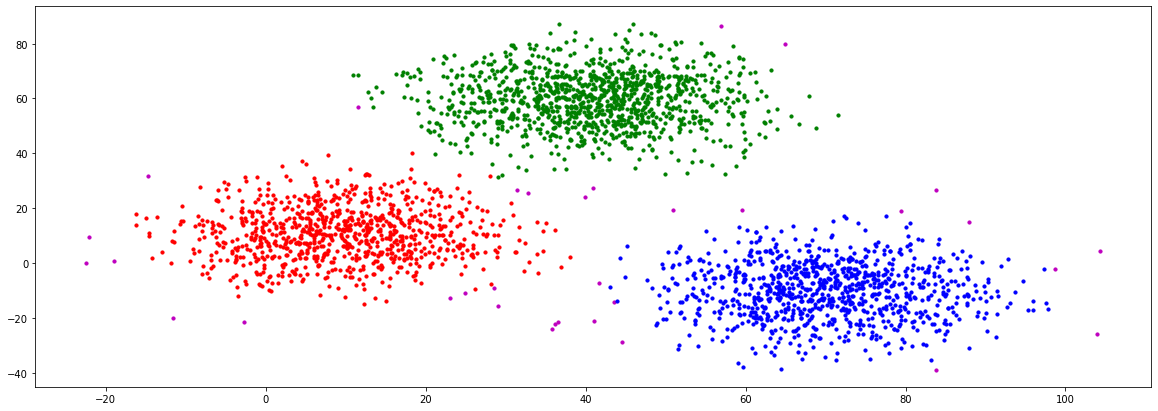

In [40]:
dbscan = DBSCAN(eps = 6, min_samples= 10).fit(data_array)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
for cluster_index in cluster_indexs :
    sub_set = np.array([data_array[i] for i in range(len(data_array)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
